# Análise de um empresa prestadora de serviços


### Importacao de Modulos e Arquivos


In [1]:
import pandas as pd

funcionarios_df = pd.read_csv('CadastroFuncionarios.csv', sep=';', decimal=',')
clientes_df = pd.read_csv('CadastroClientes.csv', sep=';', decimal=',')
servicos_df = pd.read_excel('BaseServiçosPrestados.xlsx')

funcionarios_df = funcionarios_df.drop(['Estado Civil', 'Cargo'], axis=1)

display(funcionarios_df)
display(clientes_df)
display(servicos_df)

,ID Funcionário,Nome Completo,Salario Base,Impostos,Beneficios,VT,VR,Area
0,1,Gabriel Mesquita,21910,10955.0,4382.0,242,719.04,Operações
1,2,João Haddad,5404,2702.0,1080.8,154,574.56,Logística
2,3,Amanda Marques Ribeiro,16066,8033.0,3213.2,154,729.12,Administrativo
3,4,Guilherme Nunez,21305,10652.5,4261.0,220,524.16,Administrativo
4,5,Adelino Gomes,5098,2549.0,1019.6,176,725.76,Administrativo
...,...,...,...,...,...,...,...,...
109,143,Renan Scharnhorst Ott,10793,5396.5,2158.6,242,514.08,Logística
110,144,Lucas Brum Pereira,4048,2024.0,809.6,198,796.32,Comercial
111,148,Caio Stellet,24596,12298.0,4919.2,242,561.12,Administrativo
112,149,Fernanda Rocha,5078,2539.0,1015.6,308,665.28,Comercial


,ID Cliente,Cliente,Valor Contrato Mensal
0,1,Teixeira Gonçalves,540
1,2,Souza Santos,1260
2,3,Emídio Alves,3195
3,4,Santos Costa,2520
4,5,Do Monteiro,3510
...,...,...,...
315,316,Manoel Costa,3690
316,317,Gomes Machado,2385
317,318,Alkindar Cardozo,3510
318,319,Pereira Fazenda,4185


,Codigo do Servico,ID Funcionário,ID Cliente,Tempo Total de Contrato (Meses)
0,OS0001,67,1,14
1,OS0002,17,2,12
2,OS0003,116,4,14
3,OS0004,37,5,8
4,OS0005,130,6,8
...,...,...,...,...
232,OS0233,111,315,4
233,OS0234,124,316,8
234,OS0235,72,317,6
235,OS0236,90,319,14


### 1 - Folha Salarial


In [2]:
funcionarios_df['Salario Total'] = funcionarios_df['Salario Base'] + funcionarios_df['Impostos'] + funcionarios_df['Beneficios'] + funcionarios_df['VT'] + funcionarios_df['VR']

# print(sum(funcionarios_df['Salario Total']))
# print(funcionarios_df['Salario Total'].sum())
print('Total de Folha Salarial Mensal é de R$ {:,}'.format(funcionarios_df['Salario Total'].sum()))

Total de Folha Salarial Mensal é de R$ 2,717,493.22


### 2 - Faturamento da Empresa


In [3]:
faturamentos_df = servicos_df[['ID Cliente', 'Tempo Total de Contrato (Meses)']].merge(clientes_df[['ID Cliente', 'Valor Contrato Mensal']], on='ID Cliente')

faturamentos_df['Faturamento Total'] = faturamentos_df['Valor Contrato Mensal'] * faturamentos_df['Tempo Total de Contrato (Meses)']

print('Fatutamento total da Empresa foi de R$ {:,}'.format(sum(faturamentos_df['Faturamento Total'])))

Fatutamento total da Empresa foi de R$ 5,519,160


### 3 - % Funcionários Fecharam Contrato


In [4]:
quantidade_funcionario_fecharam_contrato = len(servicos_df['ID Funcionário'].unique())
quantidade_funcionario_total = len(funcionarios_df['ID Funcionário'])

print('Percentual Funcionários que fecharam contratos: {:.2%}'.format(quantidade_funcionario_fecharam_contrato / quantidade_funcionario_total))

Percentual Funcionários que fecharam contratos: 86.84%


### 4 - Quantidades de Contratos por área


In [7]:
contratos_area_df = servicos_df[['ID Funcionário']].merge(funcionarios_df[['ID Funcionário', 'Area']], on='ID Funcionário')
contrato_area_quantidade = contratos_area_df['Area'].value_counts()
print(contrato_area_quantidade)

Administrativo    63
Operações         48
Comercial         44
Financeiro        42
Logística         40
Name: Area, dtype: int64


### 5 - Funcionários por área


Area          
Administrativo    26
Comercial         26
Operações         23
Logística         21
Financeiro        18
dtype: int64


<AxesSubplot:xlabel='Area'>

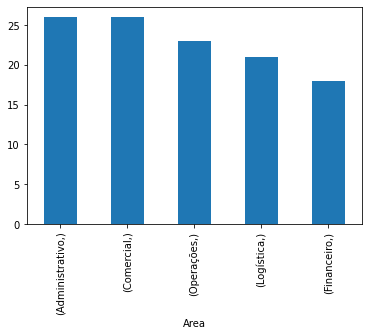

In [9]:
funcionarios_area_df = funcionarios_df[['Area']].value_counts()
print(funcionarios_area_df)
funcionarios_area_df.plot(kind='bar')

### 6 - Ticket Médio Mensal
